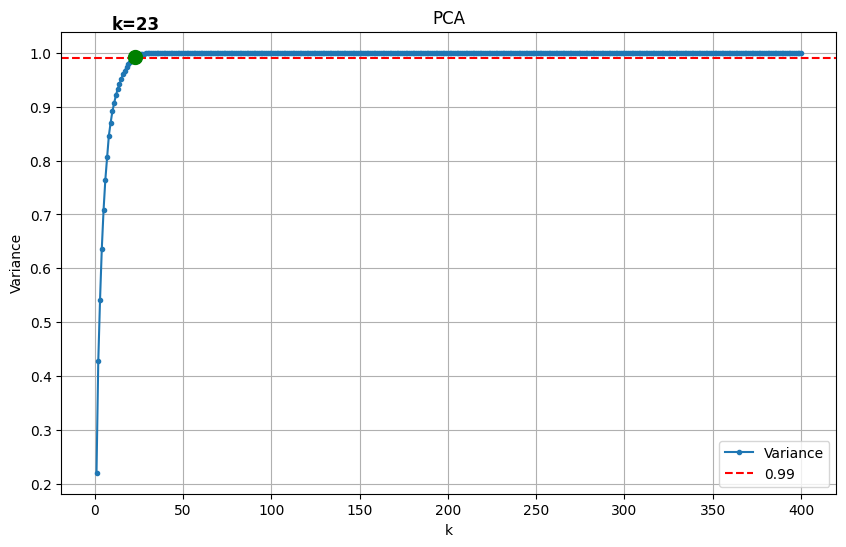

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

data = pd.read_csv(
    "RB99_1m_Turnover_31000_12120_591.csv_tz80_Train_10877.csv"
)  ### 训练集文件
data = data.drop("A0", axis=1)  ### 删除A0标签这列

# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)

num = 0.99

pca = PCA()
pca.fit(data)  ### 如果做标准化，就用 data_scaled

cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
k = np.argmax(cumulative_explained_variance >= num) + 1

plt.figure(figsize=(10, 6))
plt.plot(
    range(1, len(cumulative_explained_variance) + 1),
    cumulative_explained_variance,
    marker=".",
    label="Variance",
)
plt.axhline(y=num, color="r", linestyle="--", label=str(num))
plt.scatter(k, cumulative_explained_variance[k - 1], color="g", s=100, zorder=5)
plt.annotate(
    f"k={k}",
    (k, cumulative_explained_variance[k - 1]),
    textcoords="offset points",
    xytext=(0, 20),
    ha="center",
    fontsize=12,
    fontweight="bold",
    color="black",
)

plt.title("PCA")
plt.xlabel("k")
plt.ylabel("Variance")
plt.grid()
plt.legend()
plt.savefig("PCA.jpg")
plt.show()